# Model: Gender Only

https://www.kaggle.com/c/titanic/overview

Features included in this model are:
    
* age 
* sibsp 
* parch 
* fare


* pclass
* sex
* ticket
* embarked

The numerical features are scaled.  

# Initialization

In [1]:
%run init.ipynb

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import scale

import great_expectations as ge
from progressbar import ProgressBar

RANDOM_STATE = 42

# Define

In [16]:
def transform_X_numerical(Xy,
                          columns=['age', 'fare', 'family_size']
                         ):

    # Scale the numerical columns.
    return pd.DataFrame(scale(Xy[columns]), index=Xy.index, columns=columns )
    

def transform_X_categorical(Xy,
                columns=['sex', 'embarked', 'title', 'age_bin', 'is_child', 'is_travelling_alone']):
    
    # Encode the categorical features. The first category will be dropped.
     return pd.get_dummies(Xy[columns], drop_first=True)
    

def transform_X(Xy,
                numerical_columns=['age', 'fare', 'family_size'],
                categorical_columns=['sex', 'embarked', 'title', 'age_bin', 'is_child', 'is_travelling_alone', 'pclass']):

    # Scale the numerical columns.
    X_numerical = transform_X_numerical(Xy, numerical_columns)
    
    # Encode the categorical features. The first category will be dropped.
    X_cat_encoded =  transform_X_categorical(Xy, categorical_columns)
    
    return X_numerical.join(X_cat_encoded)

## Extract Clean Data

**Separate data into X (features) and y (label)**

In [3]:
from data.data import (transform_X_numerical, 
                           transform_X_categorical, 
                           transform_X)

In [59]:
Xy = pd.read_csv('../data/processed/train_v3.csv', index_col='passengerid', dtype={'pclass':str})

In [60]:
Xy

,survived,pclass,name,sex,sibsp,parch,ticket,embarked,title,last_name,cabin_number,family_size,fare,fare_bin,age,age_bin,is_child,is_traveling_alone
passengerid,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S,Mr,Braund,21171.0,2,7.2500,q1,22.0,student,False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,Mrs,Cumings,17599.0,2,71.2833,q4,38.0,adult,False,False
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S,Miss,Heikkinen,3101282.0,1,7.9250,q1,26.0,young_adult,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S,Mrs,Futrelle,113803.0,2,53.1000,q4,35.0,young_adult,False,False
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,S,Mr,Allen,373450.0,1,8.0500,q2,35.0,young_adult,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,S,Officer,Montvila,211536.0,1,13.0000,q2,27.0,young_adult,False,True
888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,S,Miss,Graham,112053.0,1,30.0000,q3,19.0,student,False,True
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,S,Miss,Johnston,6607.0,4,23.4500,q3,21.8,student,False,False


## Train Test Split Data

In [61]:
all_columns = ['age', 'fare', 'family_size', 'is_child', 'is_traveling_alone',
               'pclass', 'sex_male', 'embarked_Q', 'embarked_S', 'title_Miss',
       'title_Mr', 'title_Mrs', 'age_bin_(10.0, 20.0]', 'age_bin_(20.0, 30.0]',
       'age_bin_(30.0, 40.0]', 'age_bin_(40.0, 50.0]', 'age_bin_(50.0, 60.0]',
       'age_bin_(60.0, inf]']

In [62]:
important_features = ['title_Mr', 'title_Mrs', 'family_size', 'is_child', 'pclass_2', 'pclass_3']

#important_features = all_columns

In [63]:
X_all = transform_X(Xy.drop(['name'], axis=1))
X = X_all[important_features]

y = Xy['survived']
X.shape

X

(891, 6)

,title_Mr,title_Mrs,family_size,is_child,pclass_2,pclass_3
passengerid,,,,,,
1,1,0,0.059160,False,0,1
2,0,1,0.059160,False,0,0
3,0,0,-0.560975,False,0,1
4,0,1,0.059160,False,0,0
5,1,0,-0.560975,False,0,1
...,...,...,...,...,...,...
887,0,0,-0.560975,False,1,0
888,0,0,-0.560975,False,0,0
889,0,0,1.299429,False,0,1


### Split data into train and test. 

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
y_test = y_test.to_frame()

print(f'Number of sample in training data = {len(X_train)}')
print(f'Number of sample in test data = {len(X_test)}')

Number of sample in training data = 712
Number of sample in test data = 179


### Logistic Regression with Age

In [65]:
X.columns

model = LogisticRegression(random_state=RANDOM_STATE, max_iter=500, fit_intercept=True,
                          penalty='l2', l1_ratio=1)

model.fit(X_train, y_train) 

pm.calc_model_rst_table_metrics(model, X_train, y_train, X_test, y_test)

Index(['title_Mr', 'title_Mrs', 'family_size', 'is_child', 'pclass_2',
       'pclass_3'],
      dtype='object')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=1, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score on X_test,y_test:  0.7989


Cross Validation Scores:
	Accuracy 	: 0.8301 (+/- 0.0332)
	Recall		: 0.7201 (+/- 0.0546)
	Precision	: 0.8079 (+/- 0.0526)
	F1		: 0.7612 (+/- 0.0477)


11/11/19, <model>,  <kaggle_accuracy>, 0.8301, 0.7201,0.8079,0.7612


(             survived_pred
 passengerid               
 710                      1
 440                      0
 841                      0
 721                      1
 40                       0
 ...                    ...
 434                      0
 774                      0
 26                       0
 85                       1
 11                       1
 
 [179 rows x 1 columns],
 0.7988826815642458,
 {'fit_time': array([0.0038569 , 0.00257993, 0.00292516, 0.00257921, 0.00303507]),
  'score_time': array([0.00546098, 0.00527692, 0.00510979, 0.00574994, 0.00535774]),
  'test_accuracy': array([0.84615385, 0.83916084, 0.8041958 , 0.81690141, 0.84397163]),
  'test_recall': array([0.75925926, 0.72222222, 0.7037037 , 0.67924528, 0.73584906]),
  'test_precision': array([0.82      , 0.82978723, 0.76      , 0.8       , 0.82978723]),
  'test_f1': array([0.78846154, 0.77227723, 0.73076923, 0.73469388, 0.78      ])})

**The code below is testing the model with various random_states to compare cross validation and test accuracy.**

# Prepare Submission

In [68]:
X_holdout = pd.read_csv('../data/processed/holdout_v3.csv', index_col='passengerid', dtype={'pclass':str})

In [69]:
X_test_kaggle_public = transform_X(X_holdout).reindex(X_test.columns, axis=1).fillna(0)
X_test_kaggle_public

,title_Mr,title_Mrs,family_size,is_child,pclass_2,pclass_3
passengerid,,,,,,
892,1,0,-0.553443,False,0,1
893,0,1,0.105643,False,0,1
894,1,0,-0.553443,False,1,0
895,1,0,-0.553443,False,0,1
896,0,1,0.764728,False,0,1
...,...,...,...,...,...,...
1305,1,0,-0.553443,False,0,1
1306,0,1,-0.553443,False,0,0
1307,1,0,-0.553443,False,0,1


In [70]:
model

X_test_kaggle_public.columns

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=1, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Index(['title_Mr', 'title_Mrs', 'family_size', 'is_child', 'pclass_2',
       'pclass_3'],
      dtype='object')

In [71]:
y_pred = (pd.Series(model.predict(X_test_kaggle_public), 
                   index=X_test_kaggle_public.index, name='Survived').to_frame().sort_index()
         )

y_pred.index.names = ['PassengerId']
y_pred

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [72]:
y_pred = (pd.Series(model.predict(X_test_kaggle_public), 
                   index=X_test_kaggle_public.index, name='Survived').to_frame().sort_index()
         )

model
X_test_kaggle_public.columns

y_pred.index.names = ['PassengerId']
y_pred

y_submission = (pd.read_csv('../data/raw/gender_submission.csv')
                .set_index('PassengerId')
               )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=1, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Index(['title_Mr', 'title_Mrs', 'family_size', 'is_child', 'pclass_2',
       'pclass_3'],
      dtype='object')

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [73]:
filename = 'logreg_model_3.2b_resubmit.csv'
y_pred.to_csv(filename)

y_pred_file = (pd.read_csv(filename)
                .set_index('PassengerId')
               )

(y_pred_file.index == y_submission.index).all()
y_pred_file.index.names == y_submission.index.names
(y_pred_file.columns == y_submission.columns).all()

True

True

True

In [74]:
(y_pred.index == y_submission.index).all()
y_pred.index.names == y_submission.index.names
(y_pred.columns == y_submission.columns).all()

True

True

True

# Simplify Model

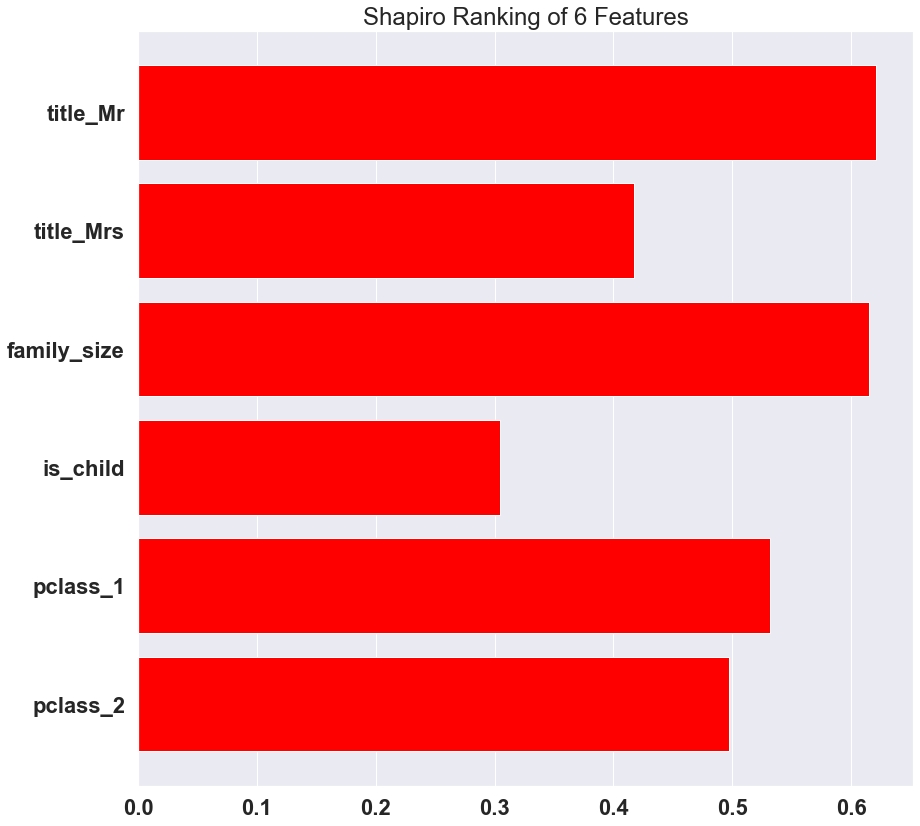

In [53]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro', size=(1000,1000))

visualizer.fit(X, y, )           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show();          # Finalize and render the figure

https://www.districtdatalabs.com/visualize-data-science-pipeline-with-yellowbrick

In [54]:
from cycler import cycler
import matplotlib as mpl
from yellowbrick.model_selection import FeatureImportances

FeatureImportances(absolute=True,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x127aa74a8>,
                   colormap=None, colors=None, is_fitted='auto',
                   labels=Index(['title_Mr', 'title_Mrs', 'family_size', 'is_child', 'pclass_1',
       'pclass_2'],
      dtype='object'),
                   model=None, relative=False, stack=False, xlabel=None)

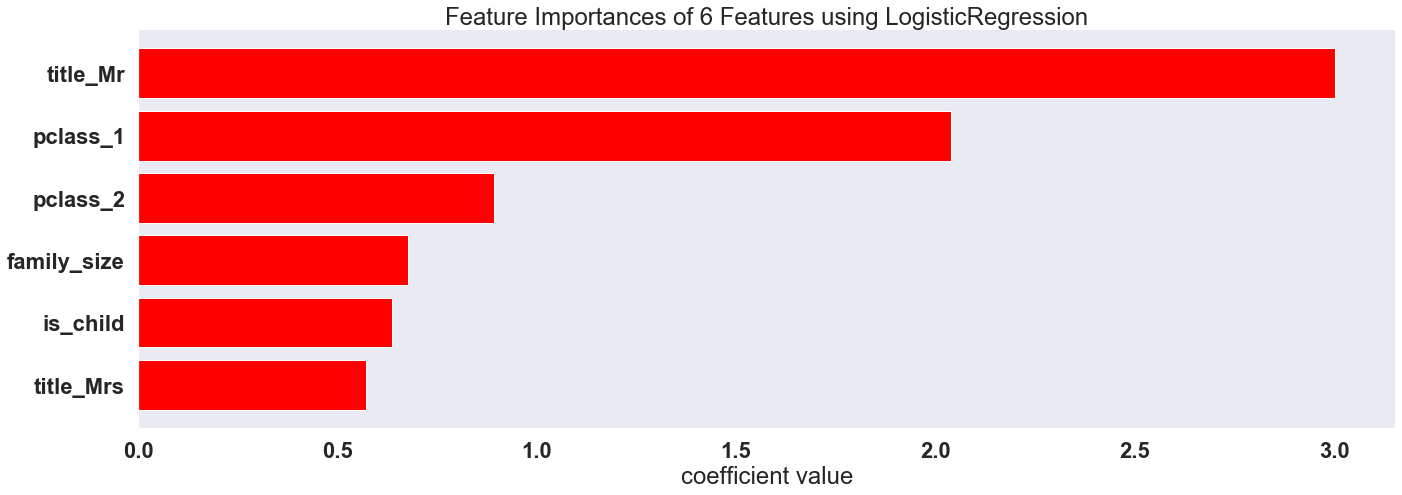

In [55]:
# Create a new figure
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['red'])
fig = plt.gcf()
fig.set_size_inches(20,20)
ax = plt.subplot(311)
labels = X.columns

viz = FeatureImportances(model, ax=ax, labels=labels, relative=False, absolute=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

# Fit and display
viz.fit(X, y)
viz.poof()

17